In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor, HistGradientBoostingRegressor
from numpyencoder import NumpyEncoder
import lightgbm as lgb
import json
import joblib

In [2]:
df = pd.read_csv('multi_final.csv')
with open('features_multi.txt', 'r') as file:
    features = [feat.replace('\n', '') for feat in file]

Km_df = df[features]
Km_df['Km'] = df['Km']
Km_target = np.log10(Km_df['Km'])
Km_features = Km_df.drop(['Km'], axis = 1)
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(Km_features)
Km_features = pd.DataFrame(df_filled, columns=Km_features.columns)

C:\Users\julia\AppData\Local\Temp\ipykernel_5764\799724875.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Km_df['Km'] = df['Km']


In [3]:
scaler = joblib.load('Km_scaler_stack_multi.pkl')
stack = joblib.load('Km_model_stack_multi.pkl')

In [4]:
random_st = 20
size_of_test = 0.2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(Km_features, Km_target, test_size=size_of_test,
                                                    random_state=random_st)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)
y_pred = stack.predict(x_test)

In [6]:
print("R2__score")
print(r2_score(y_test, y_pred))
print("MAE")
print(mean_absolute_error(y_test, y_pred))

R2__score
0.7543183073903501
MAE
0.4898136612531307


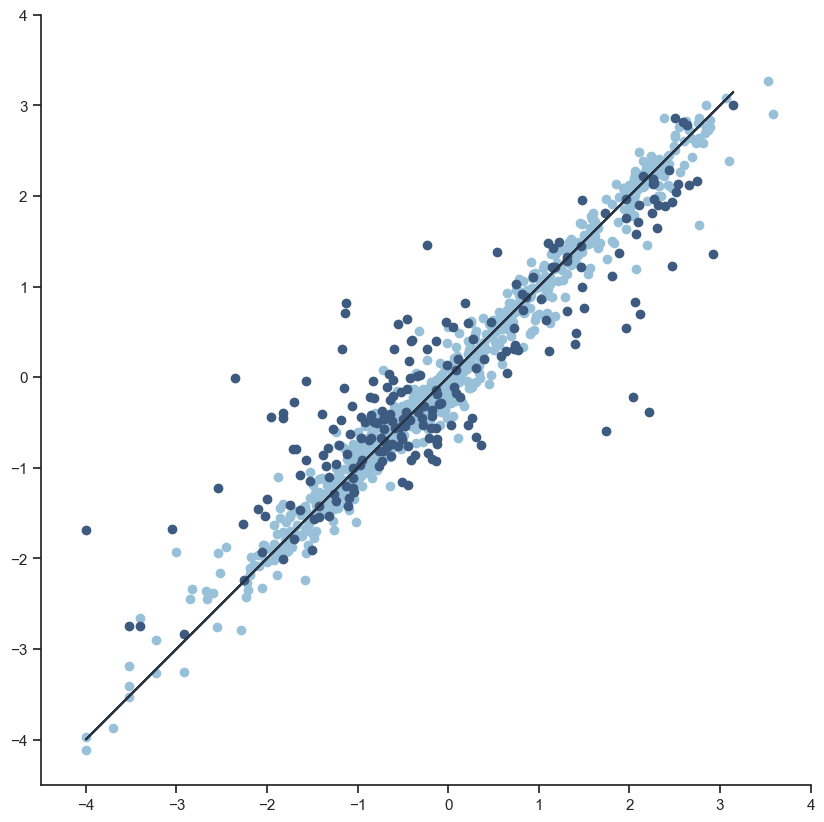

In [14]:
y1_pred = stack.predict(x_train)
import matplotlib.pylab as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#98c1d9')
plt.scatter(y_test, y_pred, color='#3d5a80')
plt.plot(y_test, y_test, color='#293241')
plt.xlim(-4.5, 4)
plt.ylim(-4.5, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [7]:
df_val = pd.read_csv('multi_valid.csv')
Km_df_val = df_val[features]
Km_df_val['Km'] = df_val['Km']
y_val = np.log10(Km_df_val['Km'])
Km_features_val = Km_df_val.drop(['Km'], axis = 1)
imputer = KNNImputer(n_neighbors=5)
df_filled_val = imputer.fit_transform(Km_features_val)
Km_features_val = pd.DataFrame(df_filled_val, columns=Km_features_val.columns)

C:\Users\julia\AppData\Local\Temp\ipykernel_5764\1651728996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Km_df_val['Km'] = df_val['Km']


In [9]:
x_val =scaler.transform(Km_features_val)
y2_pred = stack.predict(x_val)
print("MAE")
print(mean_absolute_error(y_val, y2_pred))

MAE
0.6478244145418308


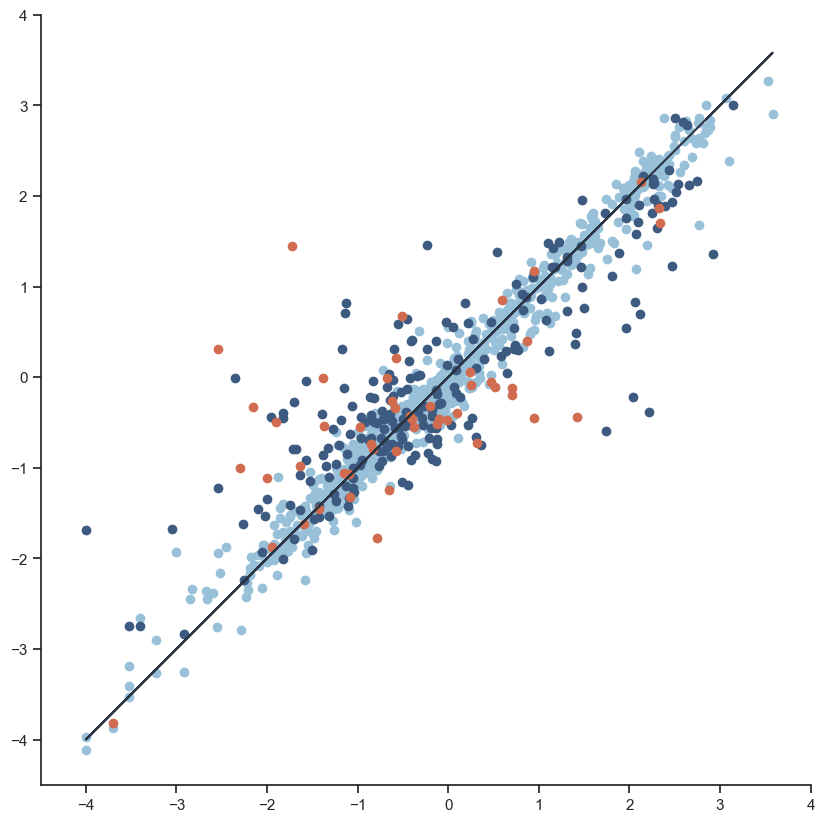

In [15]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#98c1d9')
plt.scatter(y_test, y_pred, color='#3d5a80')
plt.scatter(y_val, y2_pred, color='#D26C50')
plt.plot(y_train, y_train, color='#293241')
plt.xlim(-4.5, 4)
plt.ylim(-4.5, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()